# 特征脸

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import fetch_lfw_people

In [4]:
faces = fetch_lfw_people()

In [5]:
faces

{'data': array([[ 34.      ,  29.333334,  22.333334, ...,  14.666667,  16.      ,
          14.      ],
        [158.      , 160.66667 , 169.66667 , ..., 138.66667 , 135.33333 ,
         130.33333 ],
        [ 77.      ,  81.333336,  88.      , ..., 192.      , 145.33333 ,
          66.333336],
        ...,
        [ 38.      ,  41.666668,  55.333332, ...,  66.      ,  63.666668,
          54.333332],
        [ 16.666666,  24.333334,  60.333332, ..., 219.      , 143.33333 ,
          69.333336],
        [ 58.333332,  48.      ,  20.      , ..., 116.      , 106.333336,
         143.33333 ]], dtype=float32),
 'images': array([[[ 34.      ,  29.333334,  22.333334, ...,  20.      ,
           25.666666,  30.666666],
         [ 37.333332,  32.      ,  25.333334, ...,  21.      ,
           26.666666,  32.      ],
         [ 33.333332,  32.333332,  40.333332, ...,  23.666666,
           28.      ,  35.666668],
         ...,
         [166.      ,  97.      ,  44.333332, ...,   9.666667,
     

In [6]:
faces.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

In [7]:
faces.data.shape

(13233, 2914)

In [9]:
faces.images.shape

(13233, 62, 47)

In [11]:
random_indexes = np.random.permutation(len(faces.data))
X = faces.data[random_indexes]

In [14]:
example_faces = X[:36, :]
example_faces.shape

(36, 2914)

In [15]:
def plot_faces(faces):
    fig, axes = plt.subplots(6, 6, figsize=(10, 10),
                            subplot_kw = {'xticks':[], 'yticks':[]},
                            gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(faces[i].reshape(62, 47), cmap='bone')
    plt.show()

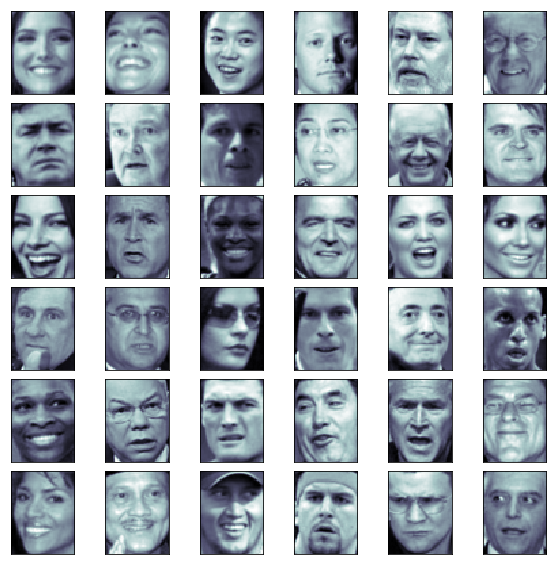

In [16]:
plot_faces(example_faces)

In [17]:
faces.target_names

array(['AJ Cook', 'AJ Lamas', 'Aaron Eckhart', ..., 'Zumrati Juma',
       'Zurab Tsereteli', 'Zydrunas Ilgauskas'], dtype='<U35')

In [18]:
len(faces.target_names)

5749

## 特征脸

In [20]:
%%time
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized')
pca.fit(X)

Wall time: 29.5 s


In [22]:
pca.components_.shape

(2914, 2914)

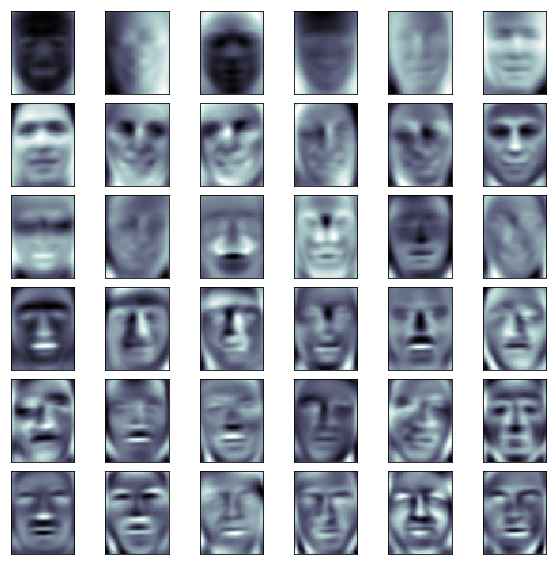

In [23]:
plot_faces(pca.components_[:36, :])

In [24]:
faces2 = fetch_lfw_people(min_faces_per_person=60)

In [25]:
faces2.data.shape

(1348, 2914)

In [26]:
faces2.target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Junichiro Koizumi',
       'Tony Blair'], dtype='<U17')

In [27]:
len(faces2.target_names)

8